> __Content modified under Creative Commons Attribution license CC-BY
> 4.0, code under BSD 3-Clause License © 2020 R.C. Cooper__

# 03 - Numerical Error
## Freefall Model Computational solution

![Object falling through the sky](../images/freefall.png)

Here is your first computational mechanics model. 

An object falling is subject to the force of 

- gravity ($F_g$=mg) and 
- drag ($F_d=cv^2$)

Acceleration of the object:

$\sum F=ma=F_g-F_d=mg - cv^2 = m\frac{dv}{dt}$

### Define constants and analytical solution (meters-kilogram-sec)

Define parameters as the acceleration due to gravity, g, drag
coefficient, c, and mass of the object, m. Once you have defined these
parameters, You have a single variable whose derivative $\frac{dv}{dt}$
is equal to a function of itself $v$ i.e. $\frac{dv}{dt} =
f(v,~parameters)$. 

**parameters:**

g=9.81 m/s$^2$, c=0.25 kg/m, m=60 kg

**function:**

$\frac{dv}{dt} = g-\frac{c}{m}v^2$

We can solve for the analytical solution in this case. First, consider the speed of the falling object when acceleration is $\frac{dv}{dt}=0$, this is called the terminal velocity, $v_{terminal}$.  

$v_{terminal}=\sqrt{\frac{mg}{c}}$

Now, substitute this terminal velocity into the equation and integrate to get the analytical solution v(t):

$v(t)=v_{terminal}\tanh{\left(\frac{gt}{v_{terminal}}\right)}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise:

Calculate the terminal velocity for the given parameters, g=9.81 m/s$^2$, c=0.25 kg/m, m=60 kg.

In [2]:
c=0.25 
m=60
g=9.81 


def v_analytical(t,m,g,c):
    '''Analytical solution for the velocity of an object released from rest subject to 
    the force of gravity and the force of drag with drag coefficient, c
    
        Arguments 
    ---------
    t: time, the independent variable
    m: mass of the object
    g: acceleration due to gravity
    c: drag coefficient
    
    Returns
    -------
    v: the speed of the object at time t'''
    
    v_terminal=np.sqrt(m*g/c)
    v= v_terminal*np.tanh(g*t/v_terminal)
    return v

Inside the curly brackets—the placeholders for the values you want to
print—the `f` is for `float` and the `.4` is for four digits after the
decimal dot. The colon here marks the beginning of the format
specification (as there are options that can be passed before). There
are so many tricks to Python's string formatter that you'll usually look
up just what you need.  Another useful resource for string formatting is
the [Python String Format
Cookbook](https://mkaz.blog/code/python-string-format-cookbook/). Check
it out!

If you print these values using the string formatter,  with a total
length of `5` and only printing 2 decimal digits, you can display our
solution in a human-readable way.

```python
{:5.2f}
```
where 

- `:5` prints something with whitespace that is 5 spaces total
- `.2` prints 2 significant figures after the decimal
- `f` tells `format` that the input is a floating point number to print

In [3]:
for t in range(0,14,2):
    print('at time {:5.2f} s, speed is {:5.2f} m/s'.format(t,v_analytical(t,m,g,c)))

at time  0.00 s, speed is  0.00 m/s
at time  2.00 s, speed is 18.62 m/s
at time  4.00 s, speed is 32.46 m/s
at time  6.00 s, speed is 40.64 m/s
at time  8.00 s, speed is 44.85 m/s
at time 10.00 s, speed is 46.85 m/s
at time 12.00 s, speed is 47.77 m/s


## Analytical vs Computational Solution

The analytical solution above gives us an exact function for $v(t)$. We can input any time, `t`, and calculate the speed, `v`.

In many engineering problems, you cannot find or may not need an exact
mathematical formula for our design process. It is always helpful to
compare a computational solution to an analytical solution, because it
will tell us if our computational solution is correct. Next, you will
develop the **Euler approximation** to solve the same problem.

## Define numerical method
### Finite difference approximation

Computational models do not solve for functions e.g. v(t), but rather
functions at given points in time (or space). In the given freefall
example, you can approximate the derivative of speed, $\frac{dv}{dt}$, as
a finite difference, $\frac{\Delta v}{\Delta t}$ as such,


$\frac{v(t_{i+1})-v(t_{i})}{t_{i+1}-t_{i}}=g-\frac{c}{m}v(t_{i})^2$.


Then, you solve for $v(t_{i+1})$, which is the velocity at the next time step

$v(t_{i+1})=v(t_{i})+\left(g-\frac{c}{m}v(t_{i})^2\right)(t_{i+1}-t_{i})$

or

$v(t_{i+1})=v(t_{i})+\frac{dv_{i}}{dt}(t_{i+1}-t_{i})$

Now, you have function that describes velocity at the next timestep in
terms of a current time step. This finite difference approximation is
the basis for a number of computational solutions to ordinary and
partial differential equations. 

Therefore, when you solve a computational problem you have to choose
which points in time you want to know the velocity. To start, define
time from 0 to 12 seconds

t=[0,2,4,6,8,10,12]

In [4]:
import numpy as np
#t=np.array([0,2,4,6,8,10,12])
# or 
t=np.linspace(0,12,7)

Now, you create a `for`-loop to solve for `v_numerical` at times 2, 4, 6, 8, 10, and 12 sec. We don't need to solve for `v_numerical` at time 0 seconds because this is the initial velocity of the object. In this example, the initial velocity is v(0)=0 m/s.

In [5]:
v_numerical=np.zeros(len(t));
for i in range(1,len(t)):
    v_numerical[i]=v_numerical[i-1]+((g-c/m*v_numerical[i-1]**2))*2;

v_numerical

array([ 0.        , 19.62      , 36.03213   , 44.8328434 , 47.702978  ,
       48.35986042, 48.49089292])

Let's print the time, velocity (analytical) and velocity (numerical) to compare the results in a table. We'll use the `print` and `format` commands to look at the results.

In [6]:
print('time (s)|vel analytical (m/s)|vel numerical (m/s)')
print('-----------------------------------------------')
for i in range(0,len(t)):
    print('{:7.1f} | {:18.2f} | {:15.2f}\n'.format(t[i],v_analytical(t[i],m,g,c),v_numerical[i]));

time (s)|vel analytical (m/s)|vel numerical (m/s)
-----------------------------------------------
    0.0 |               0.00 |            0.00

    2.0 |              18.62 |           19.62

    4.0 |              32.46 |           36.03

    6.0 |              40.64 |           44.83

    8.0 |              44.85 |           47.70

   10.0 |              46.85 |           48.36

   12.0 |              47.77 |           48.49



## Compare solutions (plotting)

We can compare solutions in a figure in a number of ways:

1. plot the values, e.g. $v_{analytical}$ and $v_{numerical}$

2. plot the difference between the values (the absolute error) e.g. $v_{numerical}-v_{analytical}$

3. plot the ratio of the values e.g. $\frac{v_{numerical}}{v_{analytical}}$ (useful in finding bugs, unit analysis, etc.)

4. plot the ratio of the error to the best estimate (the relative error) e.g. $\frac{v_{numerical}-v_{analytical}}{v_{analytical}}$

Let's start with method (1) to compare our analytical and computational solutions.

Import `pyplot` and update the default plotting parameters.

In [7]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 22})
plt.rcParams['lines.linewidth'] = 3

Text(0, 0.5, 'velocity (m/s)')

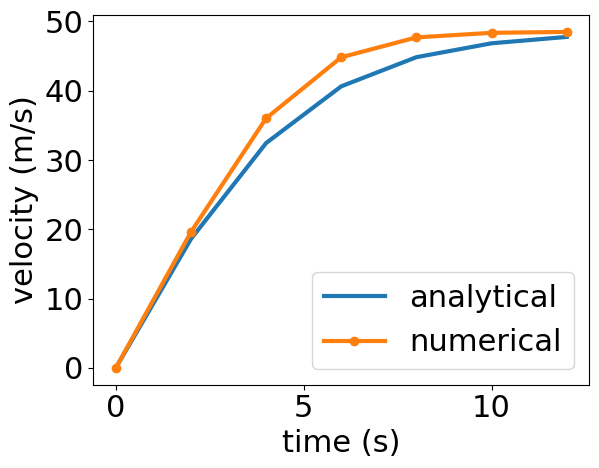

In [8]:
plt.plot(t,v_analytical(t,m,g,c),'-',label='analytical')
plt.plot(t,v_numerical,'o-',label='numerical')
plt.legend()
plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')

**Note:** In the above plot, the numerical solution is given at discrete points connected by lines, while the analytical solution is drawn as a line. This is a helpful convention. We plot discrete data such as numerical solutions or measured data as points and lines while analytical solutions are drawn as lines. 

## Exercise

Play with the values of `t` (defined above as `t=np.linspace(0,12,7)`). 

If you increase the number of time steps from 0 to 12 seconds what happens to v_analytical? to v_numerical?

What happens when you decrease the number of time steps?

## Errors in Numerical Modeling

## 1 - Truncation
## 2 - Roundoff

## 1- Truncation error
### Freefall is example of "truncation error"
#### Truncation error results from approximating exact mathematical procedure

We approximated the derivative as $\frac{d v}{d t}\approx\frac{\Delta v}{\Delta t}$

Can reduce error in two ways

1. Decrease step size -> $\Delta t$=`delta_time`

2. Increase the accuracy of the approximation

### Truncation error as a Taylor series 

The freefall problem solution used a first-order Taylor series approximation

Taylor series:
$f(x)=f(a)+f'(a)(x-a)+\frac{f''(a)}{2!}(x-a)^{2}+\frac{f'''(a)}{3!}(x-a)^{3}+...$

First-order approximation:
$f(x_{i+1})=f(x_{i})+f'(x_{i})h$


We can increase accuracy in a function by adding Taylor series terms:

|Approximation | formula |
|---|-----------------------------|
|$0^{th}$-order | $f(x_{i+1})=f(x_{i})+R_{1}$ |
|$1^{st}$-order | $f(x_{i+1})=f(x_{i})+f'(x_{i})h+R_{2}$ |
|$2^{nd}$-order | $f(x_{i+1})=f(x_{i})+f'(x_{i})h+\frac{f''(x_{i})}{2!}h^{2}+R_{3}$|
|$n^{th}$-order | $f(x_{i+1})=f(x_{i})+f'(x_{i})h+\frac{f''(x_{i})}{2!}h^{2}+...\frac{f^{(n)}}{n!}h^{n}+R_{n}$|

Where $R_{n}=O(h^{n+1})$ is the error associated with truncating the approximation at order $n$.

In the .gif below, the error in the function is reduced by including higher-order terms in the Taylor series approximation. 

![3](https://media.giphy.com/media/xA7G2n20MzTOw/giphy.gif)

$n^{th}$-order approximation equivalent to 
an $n^{th}$-order polynomial.

## 2- Roundoff

### Just storing a number in a computer requires rounding

In our analytical solution, $v(t) =
v_{terminal}\tanh{\left(\frac{gt}{v_{terminal}}\right)}$, you can solve
for velocity, $v$ at any given time, $t$ by hand to avoid roundoff
error, but this is typically more trouble than its worth. Roundoff error
comes in two forms:

1. digital representation of a number is rarely exact

2. arithmetic (+,-,/,\*) causes roundoff error

1. digital representation of $\pi$ 

[Consider the number $\pi$](https://www.piday.org/million/). How many digits can a floating point number in a computer accurately represent?

In [9]:
pi=np.pi

double=np.array([pi],dtype='float64')
single=np.array([pi],dtype='float32')
print('double precision 64 bit pi = {:1.27f}'.format(double[0])) # 64-bit
print('single precision 32 bit pi = {:1.27f}'.format(single[0])) # 32-bit
print('First 27 digits of pi      = 3.141592653589793238462643383')

double precision 64 bit pi = 3.141592653589793115997963469
single precision 32 bit pi = 3.141592741012573242187500000
First 27 digits of pi      = 3.141592653589793238462643383


In order to store the number in a computer you can only use so many bits, shown below is the [64-bit standard for floating point numbers](https://en.wikipedia.org/wiki/Double-precision_floating-point_format):

![IEEE 64-bit floating point number standard
reference](../images/IEEE754_double.png)

Where the sign is either + or -, the exponent is a power of two as in,
$2^{exponent}$, and the fraction (or base) is the binary representation
of the number, $1+\sum_{i=1}^{52}b_i2^{-i}$. We examine the floating
point number representation to highlight that any number you store in a
computer is an approximation of the real number you are trying to save.
With 64-bit floating point numbers, these approximations are
**extremely** good. 

2. Floating point arithmetic 

Each time you use an operation, e.g. `+ - / *` you lose some precision as well. 

Consider $\pi$ again, but this time you will use a for loop to multiply
$\pi$ by a 1e-16 then divide by 1e-16, then multiply by 2e-16 and divide
by 2e-16, and so on until you reach 10e-16. If we do these calculations
by hand, we see that each step in the for loop returns $\pi$, but due to
floating point arithmetic errors we accumulate some error.

In [10]:
double=np.array([pi],dtype='float64')
double_operated=double
for i in range(0,10):
    double_operated=double_operated*(i+1)*1.0e-16
    double_operated=double_operated*1/(i+1)*1.0e16
print(' 0 operations 64 bit pi = %1.26f\n'%double) # 64-bit
print('20 operations 64 bit pi = %1.26f\n'%double_operated) # 64-bit after 1000 additions and 1 subtraction
print('First 26 digits of pi   = 3.14159265358979323846264338')

 0 operations 64 bit pi = 3.14159265358979311599796347

20 operations 64 bit pi = 3.14159265358979089555191422

First 26 digits of pi   = 3.14159265358979323846264338


/tmp/ipykernel_5387/1366774004.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(' 0 operations 64 bit pi = %1.26f\n'%double) # 64-bit
/tmp/ipykernel_5387/1366774004.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('20 operations 64 bit pi = %1.26f\n'%double_operated) # 64-bit after 1000 additions and 1 subtraction


In the previous block of code, you see $\pi$ printed for 3 cases:

1. the 64-bit representation of $\pi$

2. the value of $\pi$ after it has gone through 20 math operations ($\times (0..10)10^{-16}$, then $\times 1/(0..10)10^{16}$)

3. the actual value of $\pi$ for the first 26 digits

All three (1-3) have the same first 14 digits after the decimal, then
you see a divergence between the actual value of $\pi$ (3), and $\pi$ as represented by floating point numbers. 

We can get an idea for computational limits using some built-in functions:

- `np.info('float64').max`: the largest floating point 64-bit number the computer can represent

- `np.info('float64').tiny`: the smallest non-negative 64-bit number the computer can represent

- `np.info('float64').eps`: the smallest number that can be added to 1

In [11]:
print('realmax = %1.20e\n'%np.finfo('float64').max)
print('realmin = %1.20e\n'%np.finfo('float64').tiny)
print('maximum relative error = %1.20e\n'%np.finfo('float64').eps)

realmax = 1.79769313486231570815e+308

realmin = 2.22507385850720138309e-308

maximum relative error = 2.22044604925031308085e-16



### Machine epsilon

The smallest number that can be added to 1 and change the value in a computer is called "machine epsilon", $eps$. If your numerical results are supposed to return 0, but instead return $2eps$, have a drink and move on. You won't get any closer to your result. 

In the following example, you will add $eps/2$ 1,000$\times$ to the
variable s, set to 1. The result should be $s=1+500\cdot eps$, but
because $eps/2$ is smaller than floating point operations can track, you
will get a different result depending upon how we do the addition.

a. We make a `for`-loop and add $eps/2$ 1000 times in the loop

b. We multiply $1000*eps/2$ and add it to the result

In [12]:
s1=1;
N=1000
eps=np.finfo('float64').eps
for i in range(1,N):
    s1+=eps/2;

s2=1+500*eps
print('summation 1+eps/2 over ',N,' minus 1 =',(s2-1))
print(N/2,'*eps=',(s2-1))

summation 1+eps/2 over  1000  minus 1 = 1.1102230246251565e-13
500.0 *eps= 1.1102230246251565e-13


### Exercise

1. Try adding $2eps$ to 1 and determine the result of the previous exercise. 

2. What is machine epsilon for a 32-bit floating point number?

## Freefall Model (revisited)

In the following example, you judge the **convergence** of our solution with the new knowledge of truncation error and roundoff error. 

**The definition for convergence in mathematics is the limit of a sequence exists.** 

In the case of the Euler approximation, the sequence is smaller timesteps, $\Delta t$, should converge to the analytical solution. 

Define time from 0 to 12 seconds with `N` timesteps 
function defined as `freefall`

m=60 kg, c=0.25 kg/m

### Freefall example

Estimated the function with a $1^{st}$-order approximation, so 

$v(t_{i+1})=v(t_{i})+v'(t_{i})(t_{i+1}-t_{i})+R_{1}$

$v'(t_{i})=\frac{v(t_{i+1})-v(t_{i})}{t_{i+1}-t_{i}}-\frac{R_{1}}{t_{i+1}-t_{i}}$

$\frac{R_{1}}{t_{i+1}-t_{i}}=\frac{v''(\xi)}{2!}(t_{i+1}-t_{i})$

or the truncation error for a first-order Taylor series approximation is

$R_{1}=O(\Delta t^{2})$

## Computer model error =  truncation + roundoff

In the function `freefall(N)`, the speed of a 60-kg object is predicted in two ways:

1. The analytical 64-bit representation, 
$v(t)=v_{terminal}\tanh{\left(\frac{gt}{v_{terminal}}\right)}$

2. The numerical 32-bit$^{+}$ Euler approximation for `N`-steps from 0 to 2 seconds

$^{+}$Here, you use a 32-bit representation to observe the transition from truncation error to floating point error in a reasonable number of steps. 

We can reduce truncation error by decreasing the timestep, $\Delta t$.
Here, consider the speed from 0 to 2 seconds, so `N=3` means $\Delta t$= 1 s and `N=21` means $\Delta t$=0.1 s

|N= | $\Delta t$=|
|---|---|
|3 | 1 s|
|21| 0.1 s|
|201| 0.01 s|
|??| 0.05 s|
|?? | 0.001 s|

What is N for 0.05 s and 0.001 s in the table above?

Answer (0.05 s): <span style="color:white"> 41 </span>

Answer (0.001 s): <span style="color:white"> 2001 </span>

Highlight lines above for answer.

In [13]:
def freefall(N):
    '''  
    help file for freefall(N)
    computes the velocity as a function of time, t, for a
    60-kg object with zero initial velocity and drag 
    coefficient of 0.25 kg/s
    Arguments:
    ----------
    N : number of timesteps between 0 and 2 sec
    Returns:
    --------
    v_analytical : the 32-bit floating point "true" solution
    v_numerical : the 32-bit approximation of the velocity
    t : the timesteps between 0 and 10 sec, divided into N steps
    '''
    t=np.linspace(0,10,N)
    c=0.25
    m=60
    g=9.81
    v_terminal=np.sqrt(m*g/c)

    v_analytical = v_terminal*np.tanh(g*t/v_terminal);
    v_numerical=np.zeros(len(t))
    delta_time =np.diff(t)
    for i in range(0,len(t)-1):
        v_numerical[i+1]=v_numerical[i]+(g-c/m*v_numerical[i]**2)*delta_time[i];
    
    return v_analytical.astype(np.float32), v_numerical.astype(np.float32), t.astype(np.float32)
    

We can visualize how the approximation approaches the exact solution with this method. The process of approaching the "true" solution is called **convergence**. 

First, solve for `n=2` steps, so t=[0,2]. We can time the solution to get a sense of how long the computation will take for larger values of `n`.

In [14]:
%%time
n=5

v_analytical,v_numerical,t=freefall(n);

CPU times: user 147 µs, sys: 4 µs, total: 151 µs
Wall time: 130 µs


The block of code above assigned three variables from the function `freefall`. 

1. `v_analytical` = $v_{terminal}\tanh{\left(\frac{gt}{v_{terminal}}\right)}$

2. `v_numerical` = Euler step integration of  $\frac{dv}{dt}= g - \frac{c}{m}v^2$

3. `t` = timesteps from 0..2 with `n` values, here t=np.array([0,2])

All three variables have the same length, so you can plot them and visually compare `v_analytical` and `v_numerical`. This is the comparison method (1) from above.

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

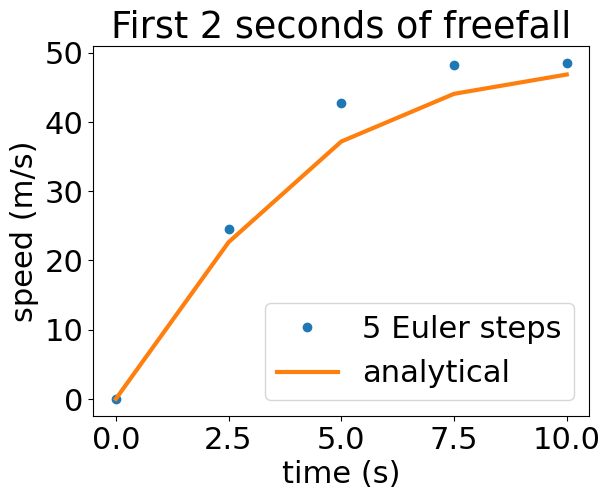

In [16]:
plt.plot(t,v_numerical,'o',label=str(n)+' Euler steps')
plt.plot(t,v_analytical,label='analytical')
plt.title('First 2 seconds of freefall')
plt.xlabel('time (s)')
plt.ylabel('speed (m/s)')
plt.legend()

### Exercise

Try adjusting `n` in the code above to watch the solution converge. You should notice the Euler approximation becomes almost indistinguishable from the analytical solution as `n` increases.

### Convergence of a numerical model

You should see that the more time steps you use, the closer the Euler
approximation resembles the analytical solution. This is true only to a
point, due to **roundoff error**. In the `freefall` function, the
numerical result is saved as a 32-bit floating point array. The best analytical equation result is
`v_terminal*np.tanh(g*t/v_terminal)`.$^{+}$ 

In the next plot, you consider the relative error for the velocity at t=2 s, as a function of `N`. 

$^+$ Note: In practice, there is no reason to restrict the precision of floating point numbers. The function was written this way to highlight the effect of roundoff error without significant computational resources. You would need more timesteps to observe floating point error with 64-bit floating point numbers.

In [17]:
n = np.arange(500, 100000, 500) # create an array from 10^1 to 10^3 with N values
N = len(n)
error = np.zeros(N, dtype = np.float32)    # initialize an N-valued array of relative errors

for i in range(0,N):
    v_an, v_num, t = freefall(n[i]) # return the analytical and numerical solutions to your equation
    error[i] = np.sum((v_num[1:]-v_an[1:])/v_an[1:])/(N+1) #calculate relative error in velocity at final time t=2 s

    

Text(0.5, 1.0, 'Truncation and roundoff error \naccumulation in log-log plot')

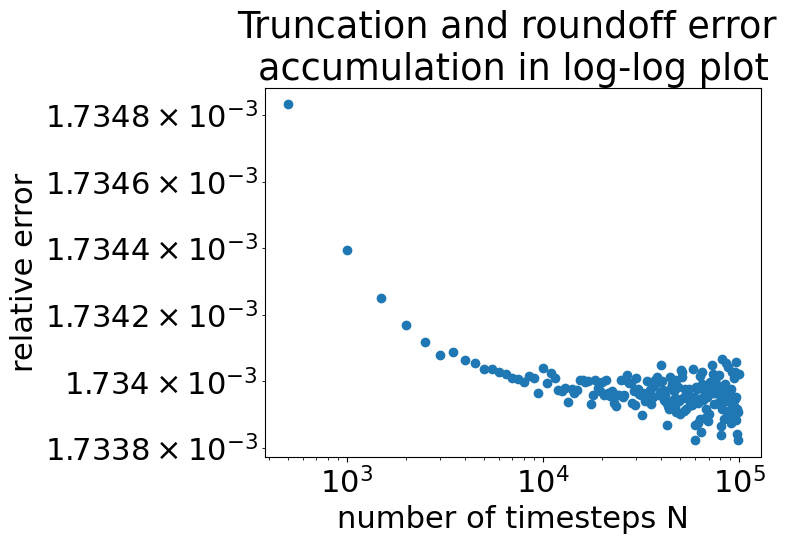

In [18]:
plt.loglog(n, error,'o')
plt.xlabel('number of timesteps N')
plt.ylabel('relative error')
plt.title('Truncation and roundoff error \naccumulation in log-log plot')

In the above plot "Truncation and roundoff error accumulation in log-log
plot", you see that around $N=10^4$ steps you stop decreasing the error
with more steps. This is because we are approaching the limit of how
precise we can store a number using a 32-bit floating point number. 

In any computational solution, there will be some point of similar diminishing in terms of accuracy (error) and computational time (in this case, number of timesteps). If you were to attempt a solution for N=1 billion, the solution could take $\approx$(1 billion)(200 $\mu s$\[cpu time for N=5\])$\approx$ 55 hours, but would not increase the accuracy of the solution.

## What you've learned

* Numerical integration with the Euler approximation
* The source of truncation errors
* The source of roundoff errors
* How to time a numerical solution or a function
* How to compare solutions
* The definition of absolute error and relative error
* How a numerical solution converges